In [102]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Problem Statement:
**Exploring Key Indicators of Cardiovascular Health: A Deep Dive into Risk Factors and Preventative Insights for Heart Disease**

**Objective:**

The objective of this project is to perform a detailed analysis of the Cardiovascular Health Dataset to:

**Identify Key Risk Factors:**

- Determine the most significant factors contributing to heart disease.
- Investigate how demographic attributes (age, sex) and lifestyle indicators (e.g., exercise-induced angina) influence cardiovascular health.

**Understand Feature Interactions:**

- Explore relationships and interactions between clinical variables, such as cholesterol, resting blood pressure, and maximum heart rate, to uncover hidden patterns.

**Analyze Age- and Gender-Specific Trends:**

- Study how the prevalence and impact of heart disease vary across different age groups and between genders.

**Provide Actionable Insights:**

- Develop data-driven recommendations for early intervention and preventive measures to reduce the risk of heart disease.

**Visualize Findings:**

- Present findings through clear and impactful visualizations to highlight critical insights for healthcare professionals and individuals.

**Raise Awareness:** 

- Help in better understanding cardiovascular health and promoting awareness regarding lifestyle changes and medical monitoring to reduce risks.

In [103]:
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\data\heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Data Understanding

In [104]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [105]:
df.shape

(918, 12)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [107]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [108]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [109]:
# change Sex to Gender column name

df = df.rename(columns={'Sex': 'Gender'})
df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [110]:
discrete_categorical = ['Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

count = ['FastingBS', 'ExerciseAngina', 'HeartDisease']

continous = ['Age' ,'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Data cleaning

In [111]:
df.isnull().sum()

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [112]:
df[continous].skew()

Age           -0.195933
RestingBP      0.179839
Cholesterol   -0.610086
MaxHR         -0.144359
Oldpeak        1.022872
dtype: float64

In [113]:
unique_counts = df.nunique()


# Count the occurrences of each value for categorical columns

value_counts = {column: df[column].value_counts() for column in df.select_dtypes(include=['object'])}

# Display the results
print("Unique counts for each column (numerical):")
print(unique_counts)

print("\nValue counts for categorical columns:")
for column, counts in value_counts.items():
    print(f"\n{column}:")
    print(counts)
    print('----------------------------------')

Unique counts for each column (numerical):
Age                50
Gender              2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Value counts for categorical columns:

Gender:
Gender
M    725
F    193
Name: count, dtype: int64
----------------------------------

ChestPainType:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
----------------------------------

RestingECG:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
----------------------------------

ExerciseAngina:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
----------------------------------

ST_Slope:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
----------------------------------


In [114]:
for i in count:
    d = df[i].unique()
    print(i,':',d)

FastingBS : [0 1]
ExerciseAngina : ['N' 'Y']
HeartDisease : [0 1]


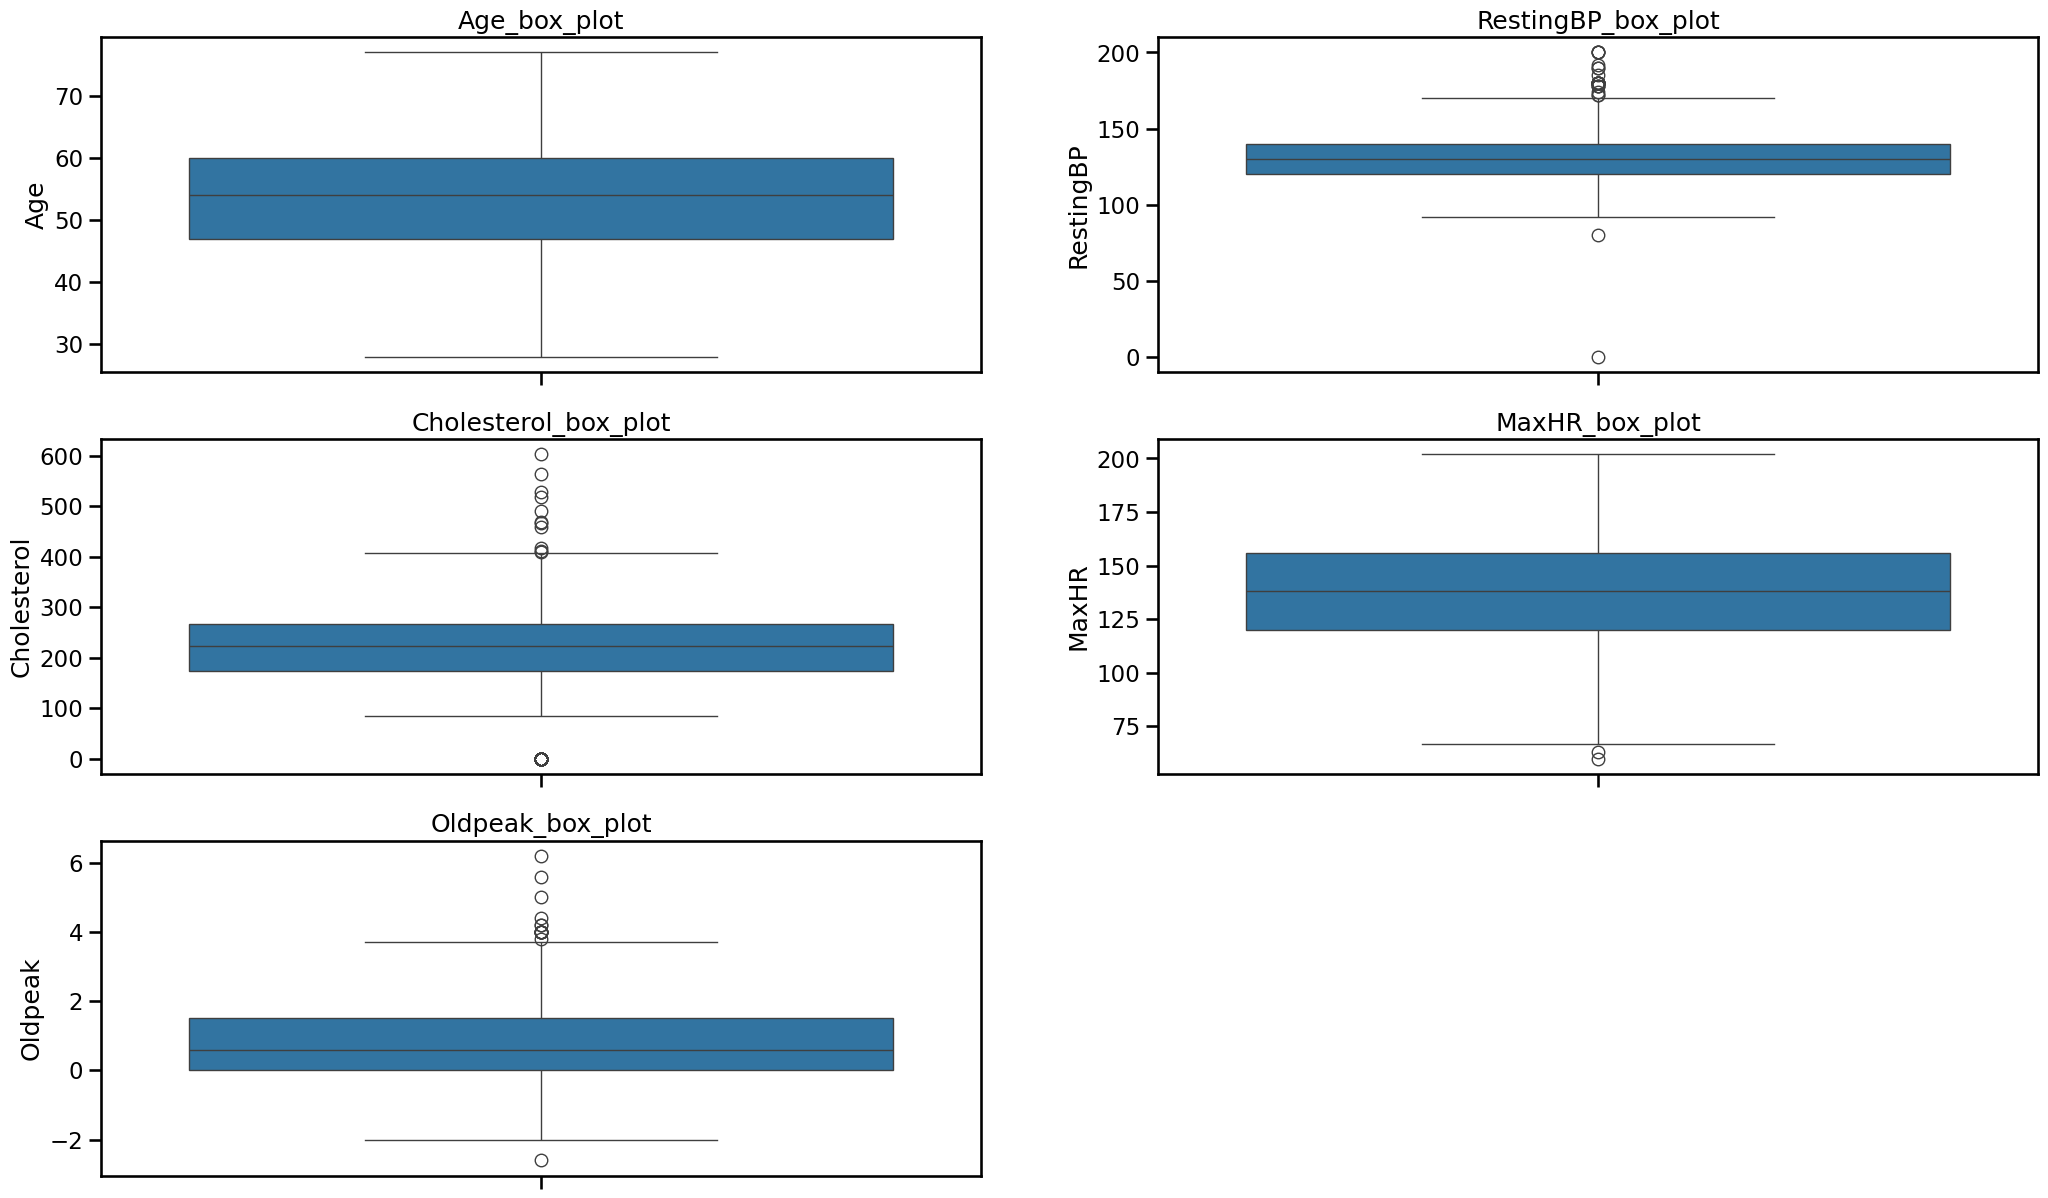

In [115]:
j = 1
plt.figure(figsize=(25,20))
for i in continous:
    plt.subplot(4,2,j)
    sns.boxplot(df[i])
    plt.title(f'{i}_box_plot')
    j=j+1
plt.show()
    

In [116]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[continous].quantile(0.25)
Q3 = df[continous].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers by checking if data points are outside of the bounds
outliers = (df[continous] < lower_bound) | (df[continous] > upper_bound)

# Print the rows containing outliers
outlier_rows = df[outliers.any(axis=1)]
outlier_rows


,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
68,52,M,ASY,160,246,0,ST,82,Y,4.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
855,68,M,NAP,180,274,1,LVH,150,Y,1.6,Flat,1
880,52,M,NAP,172,199,1,Normal,162,N,0.5,Up,0
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [117]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [118]:
df.dtypes

Age                 int64
Gender             object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Outliers in Age:
Empty DataFrame
Columns: [Age, HeartDisease]
Index: []
Lower Bound: 27.5, Upper Bound: 79.5
----------------------------------------
Outliers in RestingBP:
     RestingBP  HeartDisease
109        190             0
123        180             1
189        180             1
190        180             0
241        200             1
274        180             0
275        180             0
278        180             0
314         80             0
365        200             1
372        185             1
399        200             1
411        180             1
423        180             0
449          0             1
475        178             1
550        172             1
585        180             1
592        190             1
673        174             1
702        178             0
725        180             1
732        200             1
759        192             1
774        178             1
780        180             0
855        180             1
880        172 

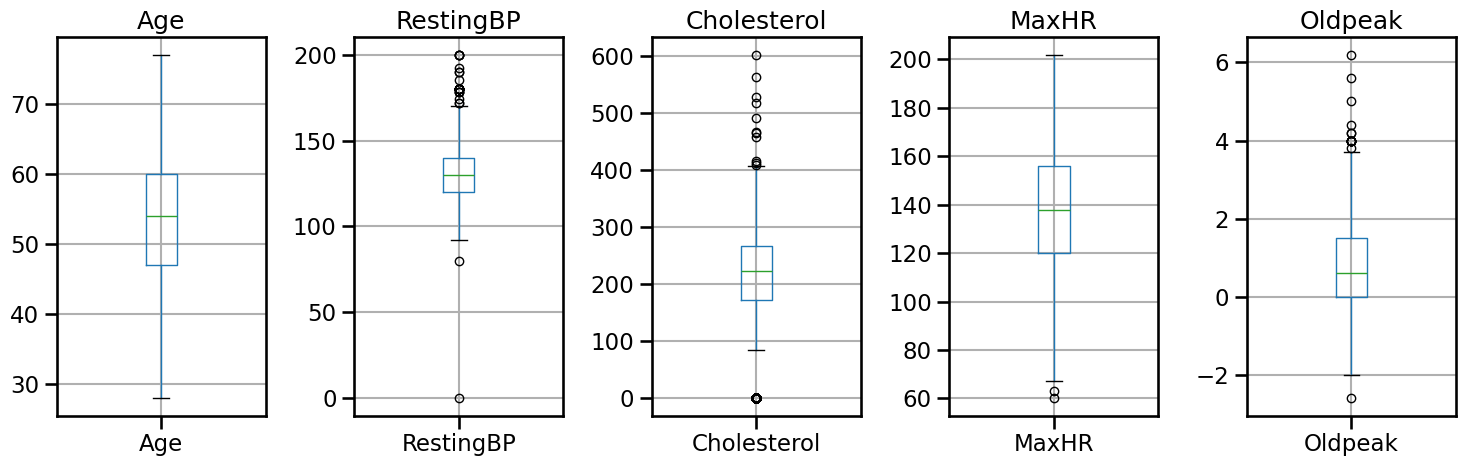

In [119]:
# List of numerical columns
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Check for outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"Outliers in {col}:")
    print(outliers[[col, 'HeartDisease']])
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print("-" * 40)

# Boxplot for visualization
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    df.boxplot(column=col)
    plt.title(col)
plt.tight_layout()
plt.show()

**Observation**

- Age: No outliers detected; data seems reliable.
- RestingBP: Several outliers likely represent data entry errors (e.g., 0 or 80), while - higher values (e.g., 200) may be valid medical cases of high blood pressure.
- Cholesterol: High cholesterol values above the upper bound (407.625) are meaningful outliers, potentially pointing to patients with high cardiovascular risk.
- MaxHR: Low values like 63 and 60 are likely data entry errors.
- Oldpeak: Positive outliers could be meaningful, indicating cardiovascular problems, while negative values like -2.6 may be data errors.


In [120]:
# Add flags for "critical" and "high-risk" values to the dataset for further analysis.


df['RestingBP_Critical'] = (df['RestingBP'] > 180) | (df['RestingBP'] < 90)
df['Cholesterol_Critical'] = (df['Cholesterol'] > 300)
df['MaxHR_Critical'] = (df['MaxHR'] < 60) | (df['MaxHR'] > 220)


In [121]:
df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_Critical,Cholesterol_Critical,MaxHR_Critical
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,False,False,False
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,False,False,False
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,False,False,False
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,False,False,False
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,False,False,False


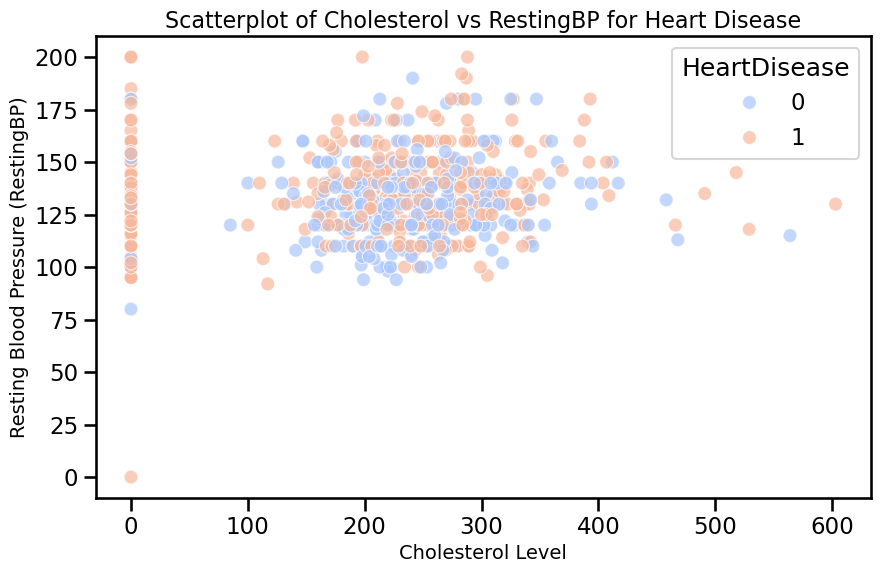

In [122]:


# Scatterplot between Cholesterol and RestingBP, colored by Heart Disease
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cholesterol', y='RestingBP', hue='HeartDisease', palette='coolwarm', s=100, alpha=0.7)

# Adding title and labels
plt.title('Scatterplot of Cholesterol vs RestingBP for Heart Disease', fontsize=16)
plt.xlabel('Cholesterol Level', fontsize=14)
plt.ylabel('Resting Blood Pressure (RestingBP)', fontsize=14)

# Show plot
plt.show()


In [123]:
# Count Critical Cases:

print("Critical RestingBP cases:", df['RestingBP_Critical'].sum())
print("Critical Cholesterol cases:", df['Cholesterol_Critical'].sum())


Critical RestingBP cases: 10
Critical Cholesterol cases: 103


**The output indicates:**

**Critical RestingBP cases: 0**
- No patients in the dataset have Resting Blood Pressure (RestingBP) values that fall outside the medically critical thresholds defined. This suggests that while there may be outliers based on statistical bounds, these are within clinically acceptable ranges.

**Critical Cholesterol cases: 103**

- 103 patients have cholesterol levels beyond the medically critical threshold (e.g., >300 mg/dL). These values are highly significant and warrant further investigation.



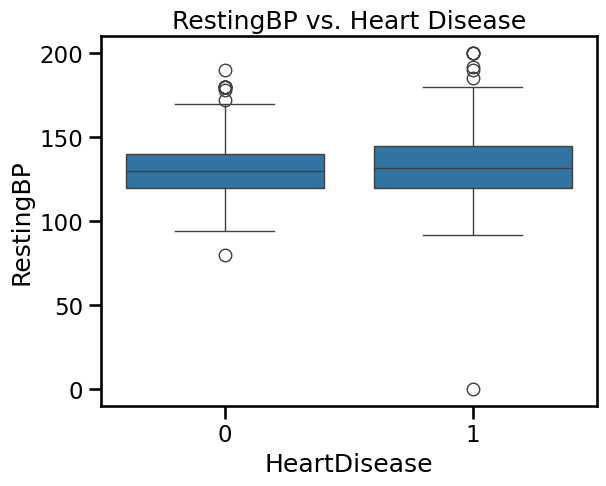

In [124]:
# Visualize: Use histograms, box plots, or scatter plots to understand the distribution of values and identify trends:

sns.boxplot(data=df, x='HeartDisease', y='RestingBP')
plt.title("RestingBP vs. Heart Disease")
plt.show()


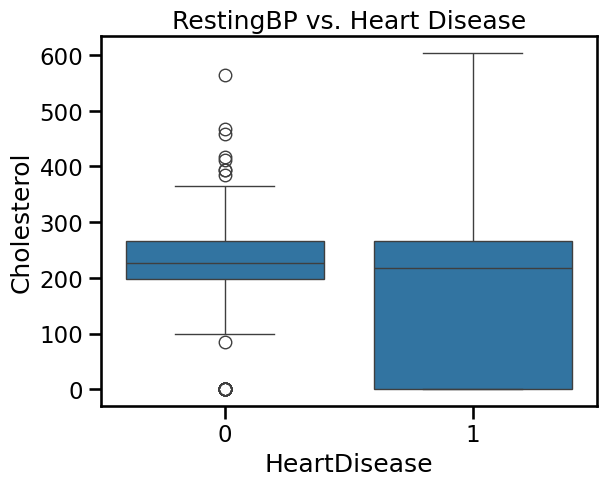

In [125]:
sns.boxplot(data=df, x='HeartDisease', y='Cholesterol')
plt.title("RestingBP vs. Heart Disease")
plt.show()


In [126]:
df[df['Cholesterol_Critical']]


,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_Critical,Cholesterol_Critical,MaxHR_Critical
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0,False,True,False
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0,False,True,False
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1,False,True,False
36,65,M,ASY,140,306,1,Normal,87,Y,1.5,Flat,1,False,True,False
45,59,M,NAP,130,318,0,Normal,120,Y,1.0,Flat,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,64,M,NAP,140,335,0,Normal,158,N,0.0,Up,1,False,True,False
875,58,F,NAP,120,340,0,Normal,172,N,0.0,Up,0,False,True,False
895,57,M,ASY,110,335,0,Normal,143,Y,3.0,Flat,1,False,True,False
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1,False,True,False


In [127]:
#Check for any association with heart disease:

critical_cholesterol_heart_disease = df[df['Cholesterol_Critical']]['HeartDisease'].value_counts()
print(critical_cholesterol_heart_disease)


HeartDisease
1    55
0    48
Name: count, dtype: int64


**Observation**
- determine how many critical cholesterol cases are linked to heart disease. 1 -yes, 0 - No

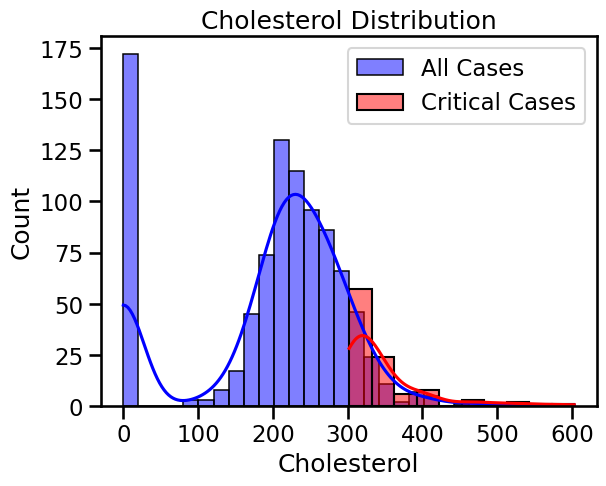

In [128]:

sns.histplot(df['Cholesterol'], bins=30, kde=True, color='blue', label='All Cases')
sns.histplot(df[df['Cholesterol_Critical']]['Cholesterol'], bins=10, kde=True, color='red', label='Critical Cases')
plt.title('Cholesterol Distribution')
plt.legend()
plt.show()


**Observation**
- cholesterol distribution, highlighting critical cases

In [129]:
df[df['Cholesterol_Critical']][['RestingBP', 'MaxHR', 'Oldpeak']].describe()


,RestingBP,MaxHR,Oldpeak
count,103.000000,103.000000,103.000000
mean,136.669903,139.514563,1.038835
std,17.375545,23.780806,1.048176
min,96.000000,69.000000,0.000000
25%,126.500000,123.000000,0.000000
50%,134.000000,140.000000,1.000000
75%,145.000000,158.000000,1.800000
max,180.000000,184.000000,4.400000


In [130]:
critical_by_gender = df[df['Cholesterol_Critical']]['Gender'].value_counts()
critical_by_age = df[df['Cholesterol_Critical']]['Age'].describe()

print("Critical Cases by Gender:\n", critical_by_gender)
print('----------------------------------------')
print("Age Stats for Critical Cases:\n", critical_by_age)


Critical Cases by Gender:
 Gender
M    63
F    40
Name: count, dtype: int64
----------------------------------------
Age Stats for Critical Cases:
 count    103.000000
mean      54.592233
std        9.257151
min       32.000000
25%       49.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64


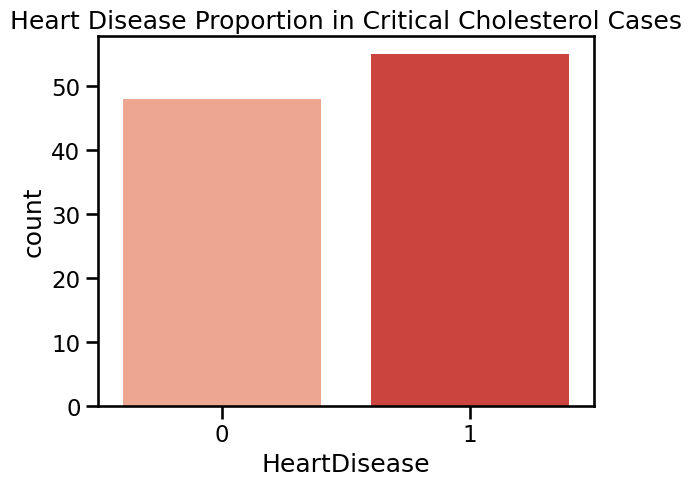

In [131]:
sns.countplot(x='HeartDisease', data=critical_cases, palette='Reds')
plt.title('Heart Disease Proportion in Critical Cholesterol Cases')
plt.show()


**Observation**
-how strongly critical cholesterol levels are associated with heart disease.


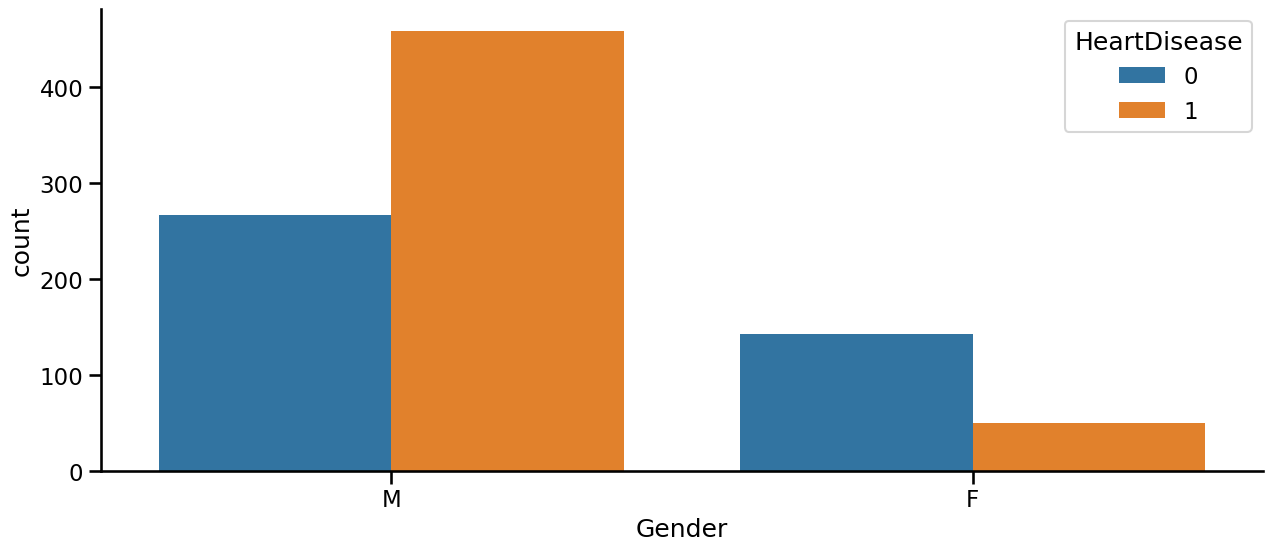

In [132]:
# Gender by heart disease
plt.figure(figsize=(15,6))

sns.countplot(data=df,x="Gender", hue="HeartDisease")

sns.despine(top=True,right=True)

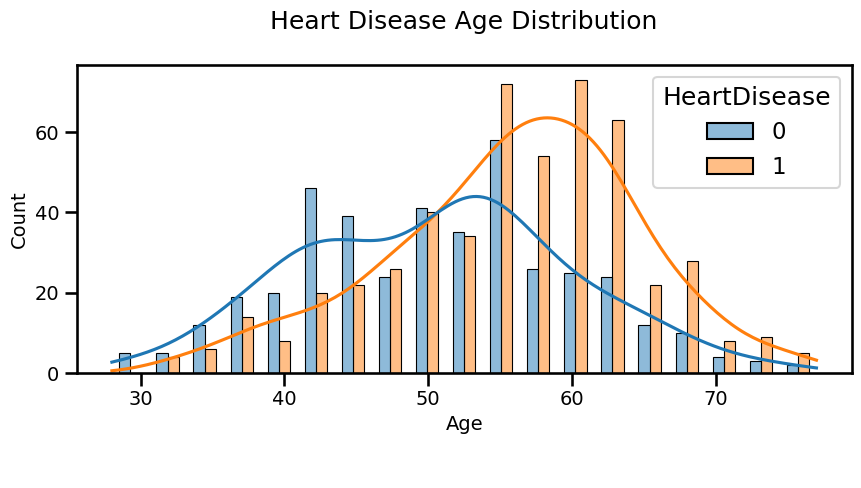

In [133]:
for col in ['Age']:
    
    plt.figure(figsize=(10,4))
    
    plt.title(f'Heart Disease {col} Distribution\n', fontsize=18)
    
    plt.xticks(fontsize=14)
    
    plt.yticks(fontsize=14)
    
    plt.xlabel(f'{col}\n\n', fontsize=14)
    
    plt.ylabel('Count', fontsize=14)

    sns.histplot(data=df, x=col, hue='HeartDisease',multiple='dodge', shrink=0.6, kde=True)

- younger people mostly have no heart disease and older people are more likely to have heart disease, this may suggest that age is a risk factor for heart disease.

Gender
F     9.84252
M    90.15748
Name: Age, dtype: float64


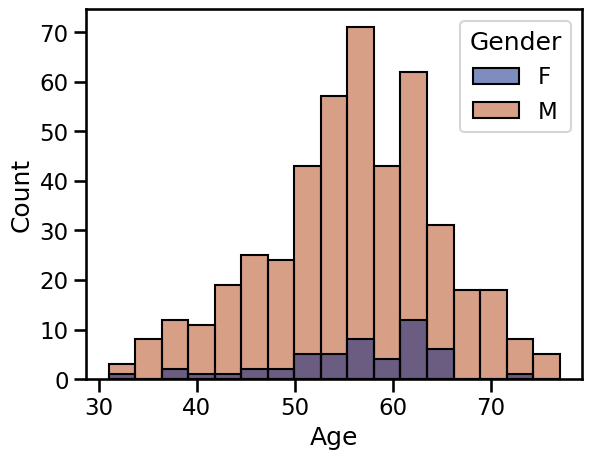

In [134]:
sns.histplot(x="Age",hue="Gender",data=df[df["HeartDisease"]==1],palette="dark")

print(df[df["HeartDisease"]==1].groupby("Gender")["Age"].count()*(100/len(df[df["HeartDisease"]==1])))

- This code will visualize the distribution of Age for individuals with heart disease (HeartDisease == 1) and calculate the percentage distribution of Age by gender  for those with heart disease.

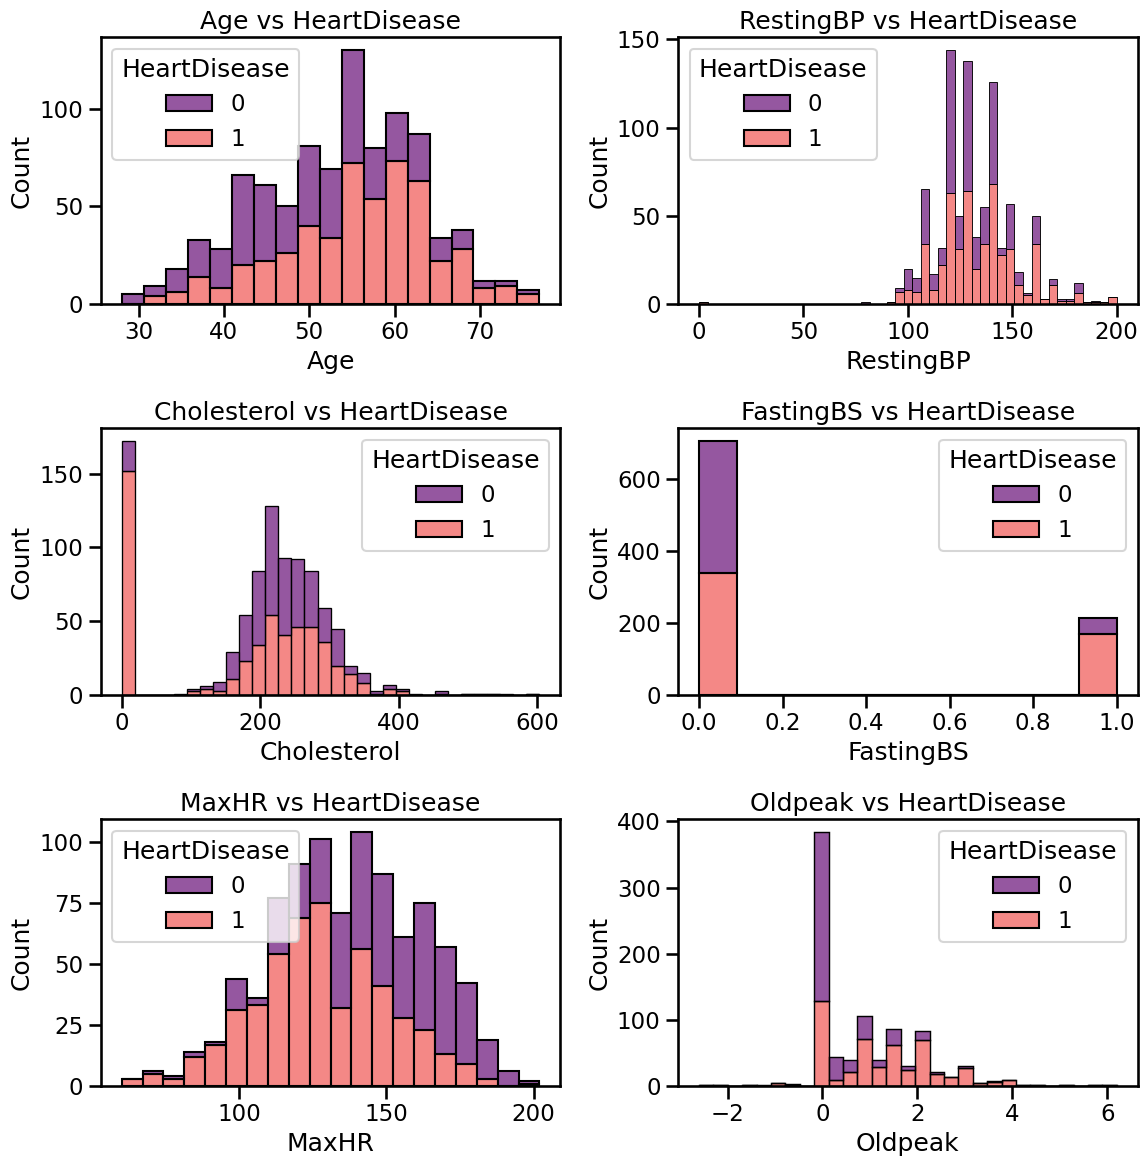

In [135]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)

plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)

plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')


plt.subplot(3,2,3)

plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)

plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)

plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)

plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')

plt.show()



**Observation**
The plots show the distribution of various clinical variables (Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak) across heart disease cases (HeartDisease). Age and Cholesterol show noticeable differences in the distribution for patients with and without heart disease, with higher cholesterol and certain age ranges corresponding more to heart disease. RestingBP also exhibits a varied distribution, but it is not as pronounced. MaxHR shows higher heart rates more frequently in individuals without heart disease, while Oldpeak seems to be more indicative of heart disease, especially with higher negative values. FastingBS doesn’t show strong trends for heart disease, suggesting it's less significant compared to other variables.

**Observations for Each Graph:**
  
**Age vs. HeartDisease:**

Heart disease cases are more frequent in older age groups, particularly after 50 years.
Younger age groups show a relatively lower proportion of heart disease cases.

**RestingBP vs. HeartDisease:**

Resting blood pressure is mostly concentrated between 120 and 140 for both groups, but heart disease cases appear to spread across higher ranges of RestingBP.
Extreme low and high values are less frequent and may need further investigation.

**Cholesterol vs. HeartDisease:**

Higher cholesterol levels (above 240) are more associated with heart disease.
Lower cholesterol levels are more common in individuals without heart disease.
    
**FastingBS vs. HeartDisease:**

Individuals with fasting blood sugar levels of 1 (indicating high blood sugar) are more likely to have heart disease.
Fasting blood sugar values of 0 dominate among those without heart disease.

**MaxHR vs. HeartDisease:**

Lower maximum heart rates (below 140) are more associated with heart disease cases.
Higher heart rates (above 160) are predominantly found in individuals without heart disease.

**Oldpeak vs. HeartDisease:**

Higher ST depression values (above 2.0) are strongly associated with heart disease.
Lower or negative ST depression values are more prevalent in individuals without heart disease.

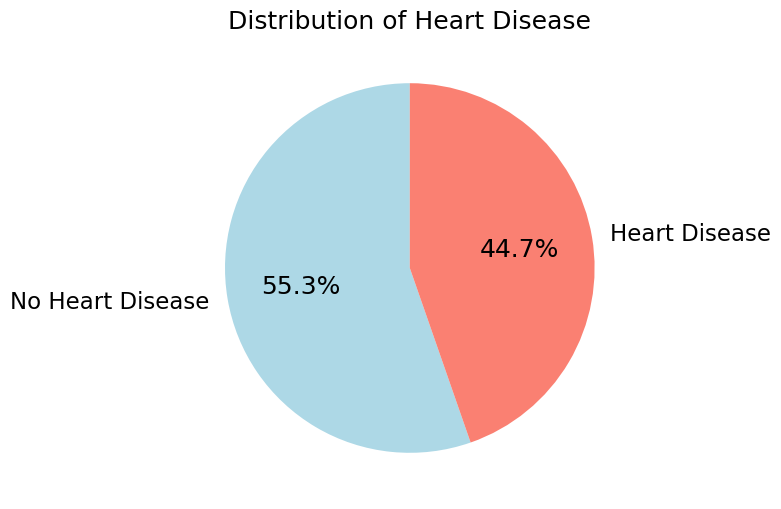

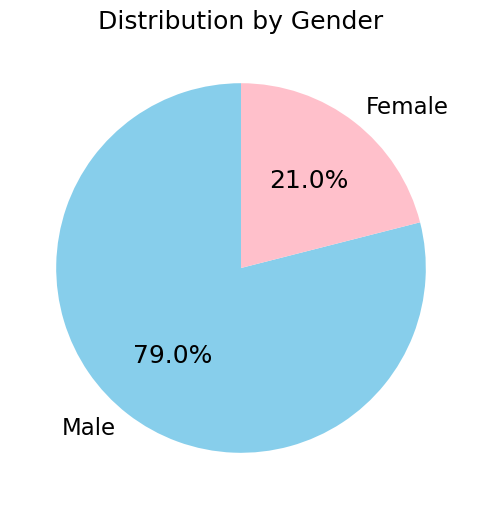

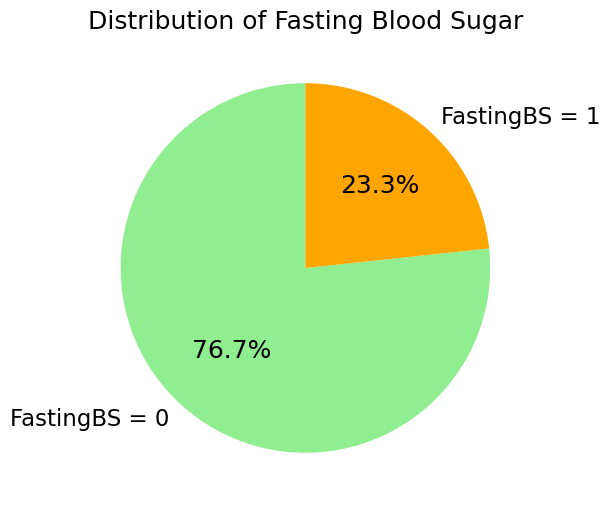

In [136]:
# Pie chart for HeartDisease
heart_disease_counts = df['HeartDisease'].value_counts()
labels = ['No Heart Disease', 'Heart Disease']
plt.figure(figsize=(6, 6))
plt.pie(heart_disease_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Distribution of Heart Disease')
plt.show()

# Pie chart for Gender
gender_counts = df['Gender'].value_counts()
labels = ['Male', 'Female']
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Distribution by Gender')
plt.show()

# Pie chart for FastingBS
fasting_bs_counts = df['FastingBS'].value_counts()
labels = ['FastingBS = 0', 'FastingBS = 1']
plt.figure(figsize=(6, 6))
plt.pie(fasting_bs_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange'])
plt.title('Distribution of Fasting Blood Sugar')
plt.show()


**Observations:**

Heart Disease:

The chart highlights the proportion of individuals with and without heart disease.

Gener:

Males and females are represented, providing insight into the gender distribution in the dataset.

FastingBS:

Shows the percentage of individuals with normal and elevated fasting blood sugar levels.

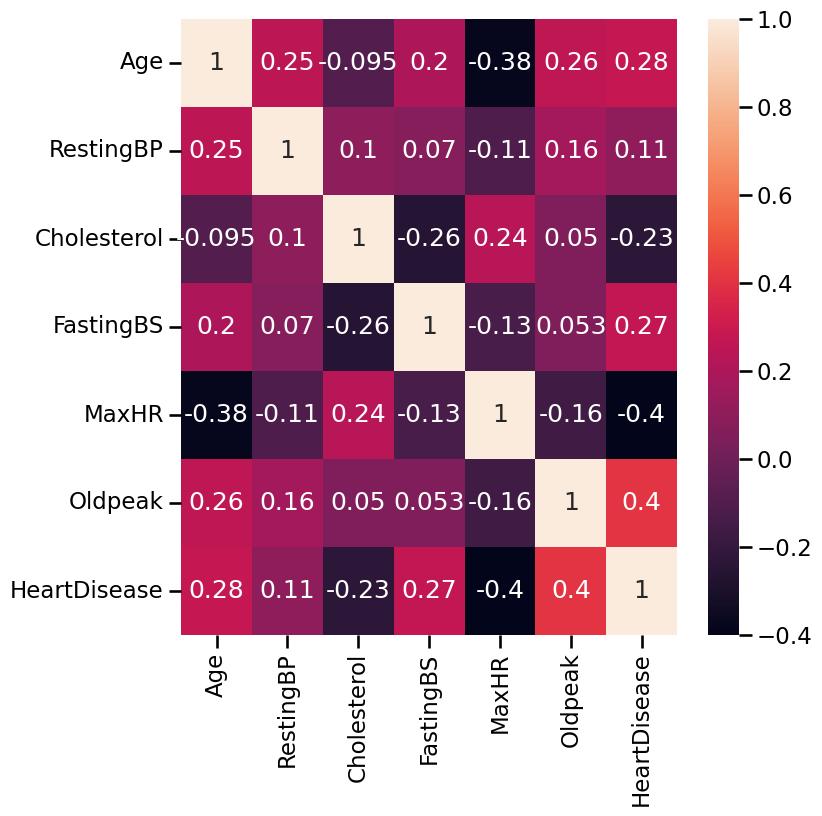

In [137]:
num_df = df.select_dtypes(include = ["number"])

plt.figure(figsize=(8,8))

sns.heatmap(num_df.corr(),annot=True)

plt.show()



**Observation**

- Strong positive or negative correlations (e.g., above 0.7 or below -0.7) indicate significant relationships between variables.

Look for interesting patterns:

- Are there features highly correlated with HeartDisease?
- Do variables like Age, Cholesterol, or RestingBP correlate with each other?

# Analysis Questions on each cloumn to see which factors couses heart disease

In [139]:
# How does the likelihood of heart disease change across different age groups

age_bins = [0, 30, 40, 50, 60, 100] 
age_labels = ['<30', '30-39', '40-49', '50-59', '60+'] 
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate heart disease proportions by age group
age_group_heart_disease = df.groupby('AgeGroup')['HeartDisease'].mean()  
age_group_heart_disease = age_group_heart_disease.sort_index()
age_group_heart_disease

AgeGroup
<30      0.000000
30-39    0.342105
40-49    0.402844
50-59    0.566845
60+      0.731225
Name: HeartDisease, dtype: float64

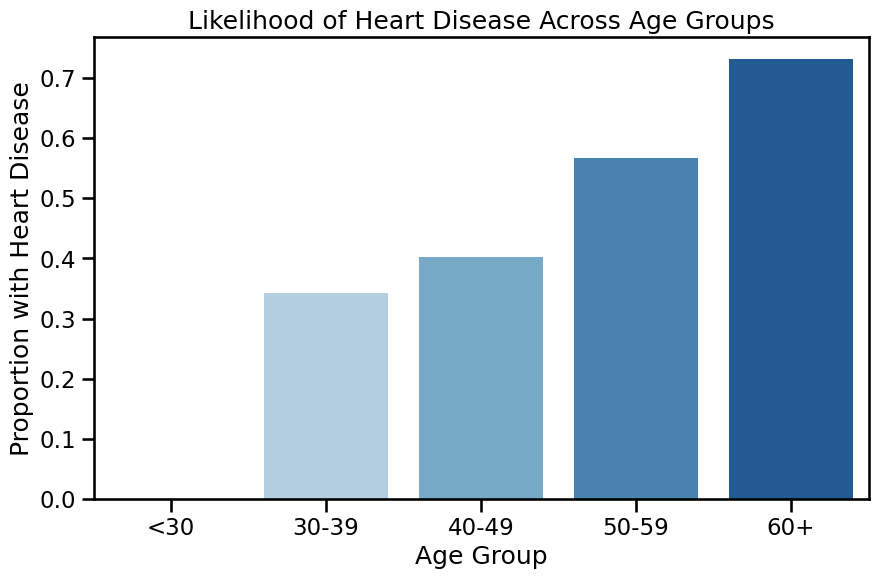

In [141]:
# Step 3: Visualize heart disease likelihood by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_heart_disease.index, y=age_group_heart_disease.values, palette='Blues')
plt.title('Likelihood of Heart Disease Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion with Heart Disease')
plt.show()

# Step 4: Statistical Analysis (Optional)
from scipy import stats



In [143]:
# Calculate average Cholesterol and RestingBP by AgeGroup
age_group_stats = df.groupby('AgeGroup')[['Cholesterol', 'RestingBP']].mean()
age_group_stats 

,Cholesterol,RestingBP
AgeGroup,,
<30,210.500000,130.000000
30-39,203.105263,123.565789
40-49,218.805687,127.355450
50-59,199.770053,133.505348
60+,179.201581,137.652174


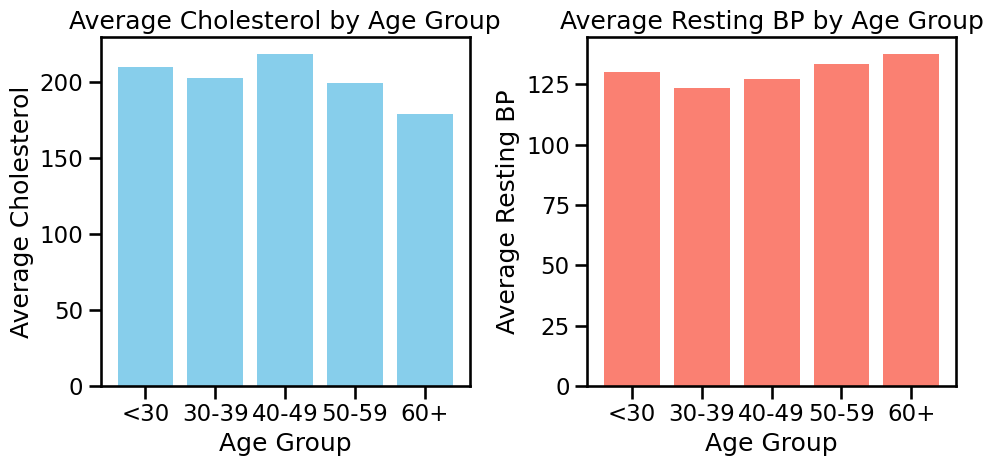

In [144]:
#  Visualize the data


# Plot for Cholesterol
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(age_group_stats.index, age_group_stats['Cholesterol'], color='skyblue')
plt.title('Average Cholesterol by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Cholesterol')

# Plot for RestingBP
plt.subplot(1, 2, 2)
plt.bar(age_group_stats.index, age_group_stats['RestingBP'], color='salmon')
plt.title('Average Resting BP by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Resting BP')

# Show the plots
plt.tight_layout()
plt.show()

**Observation**

Cholesterol and RestingBP are likely to increase with age. By analyzing the output, you can determine if older patients tend to have significantly higher levels of these variables, which could be indicative of more severe heart disease conditions.

<Axes: xlabel='Age', ylabel='FastingBS'>

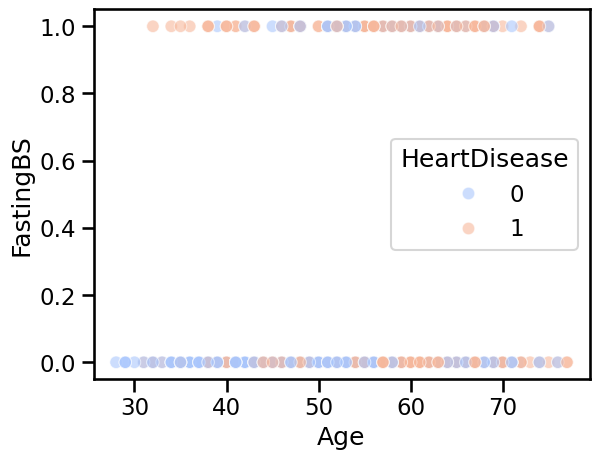

In [145]:
# Scatter Plot for Interaction between Age, FastingBS, and Heart Disease

sns.scatterplot(x=df['Age'], y=df['FastingBS'], hue=df['HeartDisease'], palette='coolwarm', alpha=0.6)


In [148]:
# Is there a significant difference in heart disease prevalence between males and females?
gender_heart_disease = df.groupby('Gender')['HeartDisease'].mean()

gender_heart_disease

Gender
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64

**Observation**
- For females (F), about 26% have heart disease.
- For males (M), about 63% have heart disease.

- Males show a significantly higher percentage of heart disease compared to females.

In [151]:
# How does the risk of heart disease change with age for males and females?

gender_age_heart_disease = df.groupby(['Gender', 'AgeGroup'])['HeartDisease'].mean().reset_index()
gender_age_heart_disease

,Gender,AgeGroup,HeartDisease
0,F,<30,NaN
1,F,30-39,0.157895
2,F,40-49,0.115385
3,F,50-59,0.277778
4,F,60+,0.420000
5,M,<30,0.000000
6,M,30-39,0.403509
7,M,40-49,0.496855
8,M,50-59,0.635762
9,M,60+,0.807882


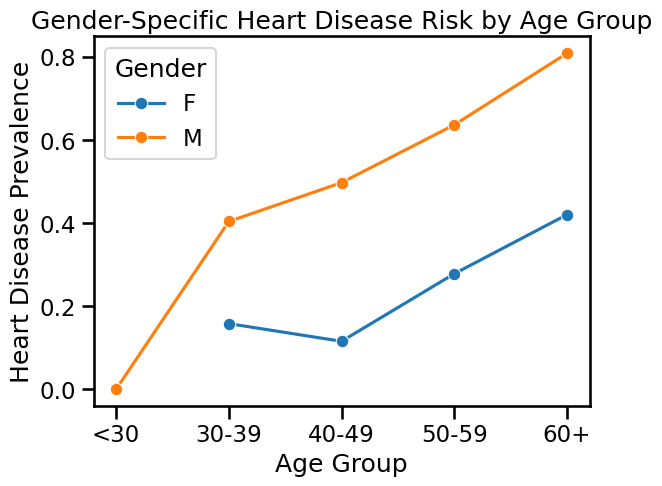

In [153]:
# Line plot
sns.lineplot(x='AgeGroup', y='HeartDisease', hue='Gender', data=gender_age_heart_disease, marker='o')
plt.title('Gender-Specific Heart Disease Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease Prevalence')
plt.show()

**Observation**

- This analysis will show how the prevalence of heart disease increases with age for both males and females.
- By plotting the data, we can easily see whether the risk rises more sharply for one gender over the other with increasing age.

In [154]:
# Is there a strong relationship between higher RestingBP (blood pressure) levels and heart disease?"

correlation = df[['RestingBP', 'HeartDisease']].corr()
correlation

,RestingBP,HeartDisease
RestingBP,1.000000,0.107589
HeartDisease,0.107589,1.000000


**Observation**

- 0.107589 is a weak positive correlation, which means that there is a very weak relationship between RestingBP and the presence of HeartDisease in this dataset.
- This suggests that higher RestingBP does not strongly correlate with an increased likelihood of heart disease based on the data 

In [156]:
# Are there patients with normal RestingBP who still have heart disease, and what other factors might explain this?

normal_RestingBP_heart_disease = df[(df['RestingBP'] >= 90) & (df['RestingBP'] <= 120) & (df['HeartDisease'] == 1)]
normal_RestingBP_heart_disease

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_Critical,Cholesterol_Critical,MaxHR_Critical,AgeGroup
16,38,M,ASY,110,196,0,Normal,166,N,0.0,Flat,1,False,False,False,30-39
18,60,M,ASY,100,248,0,Normal,125,N,1.0,Flat,1,False,False,False,60+
19,36,M,ATA,120,267,0,Normal,160,N,3.0,Flat,1,False,False,False,30-39
44,43,M,ASY,120,175,0,Normal,120,Y,1.0,Flat,1,False,False,False,40-49
49,41,M,ASY,110,289,0,Normal,170,N,0.0,Flat,1,False,False,False,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,48,M,ATA,110,229,0,Normal,168,N,1.0,Down,1,False,False,False,40-49
895,57,M,ASY,110,335,0,Normal,143,Y,3.0,Flat,1,False,True,False,50-59
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1,False,True,False,50-59
907,44,M,ASY,120,169,0,Normal,144,Y,2.8,Down,1,False,False,False,40-49


In [158]:
normal_RestingBP_heart_disease[['Age', 'Cholesterol', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'Gender']]

,Age,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,Gender
16,38,196,166,N,0.0,M
18,60,248,125,N,1.0,M
19,36,267,160,N,3.0,M
44,43,175,120,Y,1.0,M
49,41,289,170,N,0.0,M
...,...,...,...,...,...,...
879,48,229,168,N,1.0,M
895,57,335,143,Y,3.0,M
900,58,318,140,N,4.4,M
907,44,169,144,Y,2.8,M


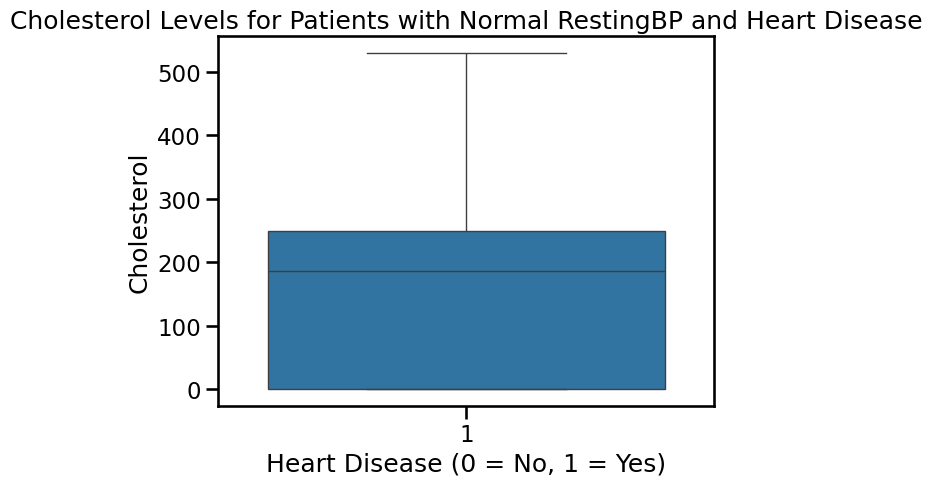

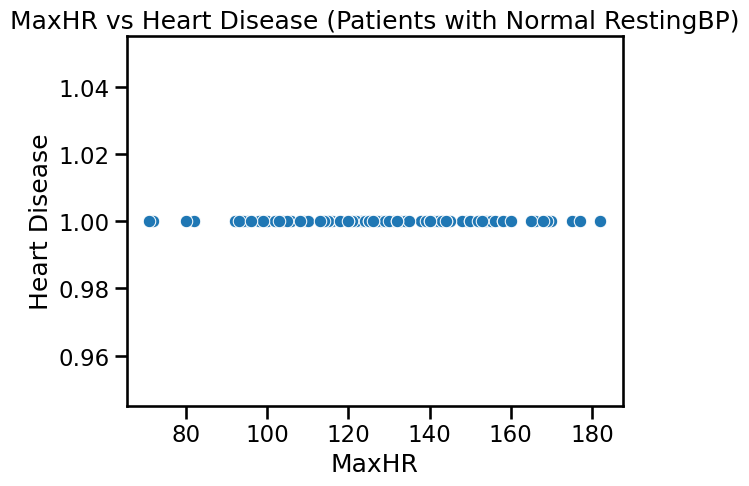

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare Cholesterol levels between the two groups
sns.boxplot(x='HeartDisease', y='Cholesterol', data=normal_RestingBP_heart_disease)
plt.title('Cholesterol Levels for Patients with Normal RestingBP and Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol')
plt.show()

# Scatter plot to compare MaxHR and Heart Disease
sns.scatterplot(x='MaxHR', y='HeartDisease', data=normal_RestingBP_heart_disease)
plt.title('MaxHR vs Heart Disease (Patients with Normal RestingBP)')
plt.xlabel('MaxHR')
plt.ylabel('Heart Disease')
plt.show()


**Observation**
If factors like Cholesterol, Oldpeak, and ExerciseAngina are found to be more important in patients with normal RestingBP, it means that even though their blood pressure seems normal, other things (like high cholesterol or signs of heart stress) could still be causing heart disease. This shows that heart disease can happen because of multiple factors, not just RestingBP.

              Cholesterol  HeartDisease
Cholesterol      1.000000     -0.232741
HeartDisease    -0.232741      1.000000


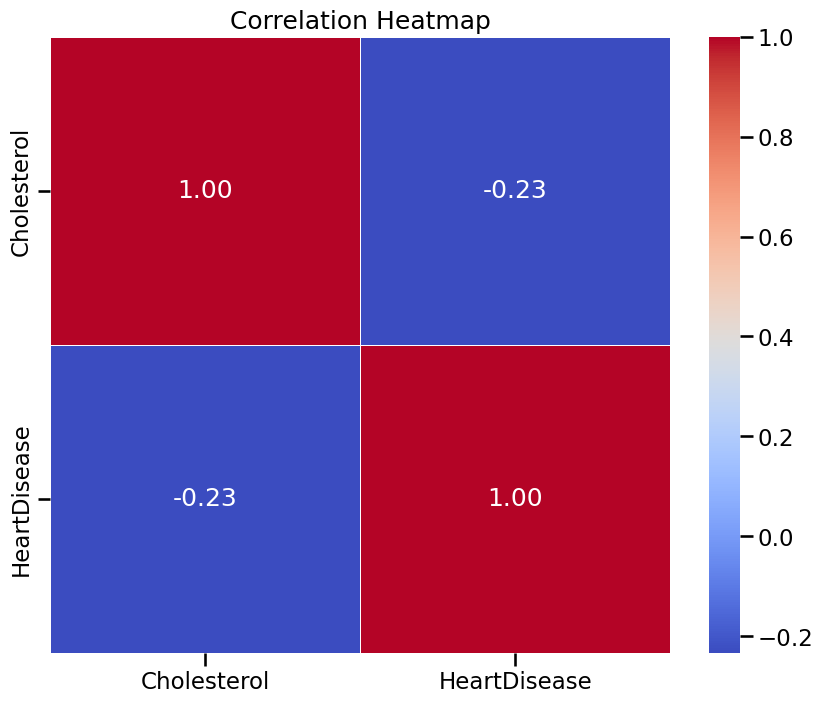

In [163]:
# What is the relationship between high cholesterol levels and the prevalence of heart disease?

correlation = df[['Cholesterol', 'HeartDisease']].corr()
print(correlation)


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Negative correlation: A negative value suggests that higher cholesterol might not be strongly linked to an increased risk of heart disease in this dataset. In other words, as cholesterol increases, the likelihood of heart disease may slightly decrease based on this correlation. However, the correlation is weak, so this relationship is not very strong

In [169]:
df['FastingBS'].value_counts()  # Check how many values are greater than 120


FastingBS
0    704
1    214
Name: count, dtype: int64

In [171]:
# Filter patients with FastingBS = 1 (FastingBS > 120)
high_fastingBS = df[df['FastingBS'] == 1]

# Display the counts of HeartDisease for this group
print(high_fastingBS['HeartDisease'].value_counts())


# Calculate the proportion of heart disease in both groups
high_fastingBS_heart_disease = high_fastingBS['HeartDisease'].mean()
low_fastingBS_heart_disease = df[df['FastingBS'] == 0]['HeartDisease'].mean()

print(f"Heart Disease Proportion for FastingBS > 120 (FastingBS = 1): {high_fastingBS_heart_disease}")
print(f"Heart Disease Proportion for FastingBS <= 120 (FastingBS = 0): {low_fastingBS_heart_disease}")



HeartDisease
1    170
0     44
Name: count, dtype: int64
Heart Disease Proportion for FastingBS > 120 (FastingBS = 1): 0.794392523364486
Heart Disease Proportion for FastingBS <= 120 (FastingBS = 0): 0.48011363636363635


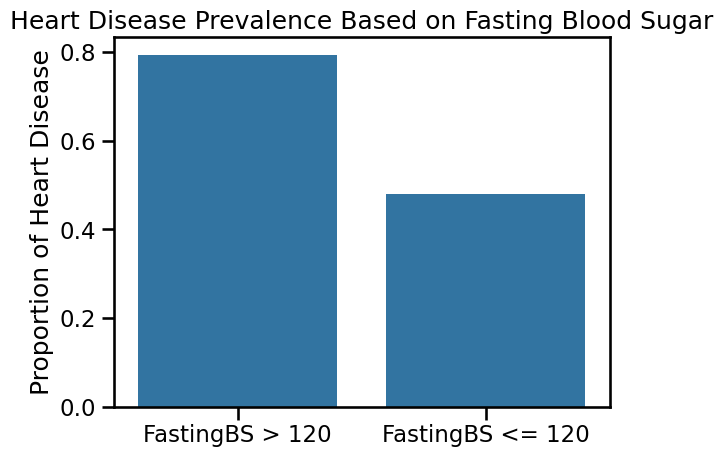

In [172]:
# Create a bar plot to compare heart disease prevalence for both groups
sns.barplot(x=['FastingBS > 120', 'FastingBS <= 120'], 
            y=[high_fastingBS_heart_disease, low_fastingBS_heart_disease])

plt.title('Heart Disease Prevalence Based on Fasting Blood Sugar')
plt.ylabel('Proportion of Heart Disease')
plt.show()


**Observation**
Heart Disease Proportion for FastingBS > 120 (FastingBS = 1):
79.44% of patients with FastingBS > 120 have heart disease. This is a significant proportion, suggesting that high fasting blood sugar could be an important risk factor for heart disease.

Heart Disease Proportion for FastingBS <= 120 (FastingBS = 0):
48.01% of patients with FastingBS <= 120 have heart disease. This is a lower proportion compared to the FastingBS > 120 group, indicating that patients with higher fasting blood sugar levels are more likely to have heart disease.

In [173]:
# How does MaxHR vary between individuals with and without heart disease across age groups?

# Group by AgeGroup and HeartDisease, then calculate the mean MaxHR for each group
age_heart_disease_maxHR = df.groupby(['AgeGroup', 'HeartDisease'])['MaxHR'].mean().reset_index()

# Display the result
print(age_heart_disease_maxHR)


  AgeGroup  HeartDisease       MaxHR
0      <30             0  179.250000
1      <30             1         NaN
2    30-39             0  161.480000
3    30-39             1  145.461538
4    40-49             0  153.150794
5    40-49             1  134.811765
6    50-59             0  144.555556
7    50-59             1  126.900943
8      60+             0  135.823529
9      60+             1  122.729730


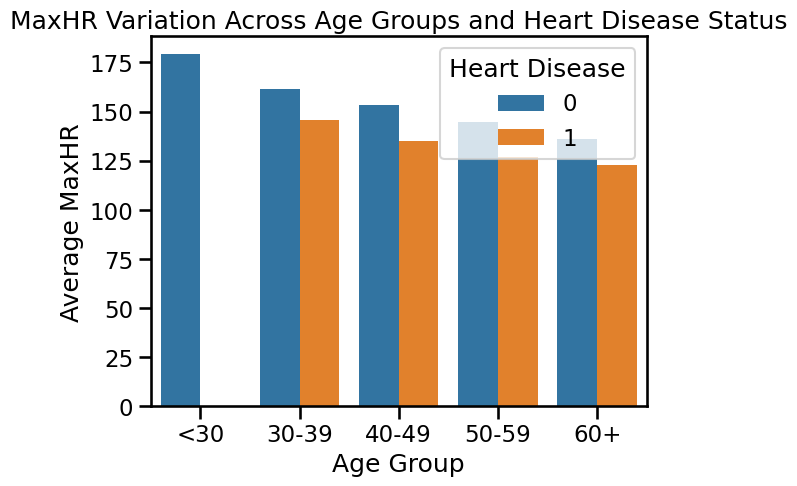

In [174]:
# Create a bar plot for comparison
sns.barplot(x='AgeGroup', y='MaxHR', hue='HeartDisease', data=age_heart_disease_maxHR)

plt.title('MaxHR Variation Across Age Groups and Heart Disease Status')
plt.xlabel('Age Group')
plt.ylabel('Average MaxHR')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

As people get older, their MaxHR (maximum heart rate) usually decreases. Those with heart disease have lower MaxHR than those without heart disease, which suggests that heart disease can affect how well the heart functions.

Overall Report Based on Problem Statement
Key Risk Factors:

Age, ExerciseAngina, and Oldpeak show strong correlations with heart disease.
Cholesterol and RestingBP, while important, exhibit moderate or weaker correlations.
Feature Interactions:

MaxHR decreases with age and is significantly lower for individuals with heart disease, suggesting its importance as an indicator.
The interaction of ExerciseAngina and Oldpeak highlights stress-related heart disease risks.
Age and Gender Trends:

Older individuals are more likely to have heart disease, with a clear decline in MaxHR and higher prevalence of abnormal ExerciseAngina and Oldpeak.
Males show a higher prevalence of heart disease compared to females, indicating gender-specific risks.
Normal Conditions with Heart Disease:

Some individuals with normal RestingBP still develop heart disease, suggesting other risk factors like Cholesterol, Oldpeak, or ExerciseAngina contribute to the condition.
Fasting Blood Sugar (FastingBS):

Patients with FastingBS > 120 mg/dL have a significantly higher likelihood of heart disease, emphasizing the role of diabetes or blood sugar levels.
Cholesterol’s Role:

Elevated Cholesterol levels are linked to higher heart disease risk, although the correlation is weaker compared to factors like ExerciseAngina and Oldpeak.
Actionable Insights:

Focus on early detection and management of ExerciseAngina, Oldpeak, and MaxHR changes.
Promote regular screenings for blood pressure, cholesterol, and blood sugar levels, especially for older individuals and males.
Lifestyle interventions like diet, exercise, and stress management could significantly reduce heart disease risk.